In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MySQLdb


# Connect to the MySQL database
host = 'localhost'
user = 'root'
password = 'mohid708@'
database = 'ecommerce'
db = MySQLdb.connect(host=host, user=user, passwd=password, db=database)

cursor = db.cursor()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7300\3275508707.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. List all unique cities where customers are located.

In [2]:
query = '''
select distinct(customer_city) from customers
'''
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


### 2. Count the number of orders placed in 2017.


In [3]:
query = """
select count(order_id) from orders where year(order_purchase_timestamp) = 2017
"""
cursor.execute(query)
data = cursor.fetchall()
f'The number of orders placed in 2017 is: {data[0][0]}'

'The number of orders placed in 2017 is: 180404'

### 3. Find the total sales per category.

In [4]:
query = """
select products.product_category as category, round(sum(payment.payment_value),2) as sales
from products join order_items on products.product_id = order_items.product_id
join payment on order_items.order_id = payment.order_id
group by category 
"""

cursor.execute(query)
data = cursor.fetchall()


df = pd.DataFrame(data)
df.columns = ['Category', 'Sales']
df

,Category,Sales
0,perfumery,18242591.76
1,Furniture Decoration,51486350.10
2,telephony,17527753.83
3,bed table bath,61651932.16
4,automotive,30682595.92
...,...,...
69,cds music dvds,43179.48
70,La Cuisine,104887.08
71,Fashion Children's Clothing,28284.12
72,PC Gamer,78279.48


### 4. Calculate the percentage of orders that were paid in installments.


In [5]:
query = """
select sum(case when payment_installments >= 1 then 1 else 0 end)/count(*) * 100 from Payment
"""

cursor.execute(query)
data = cursor.fetchall()

f'Percentage of orders that were paid in installmentsis: {data[0][0]}'

'Percentage of orders that were paid in installmentsis: 99.9981'

### 5. Count the number of customers from each state. 


In [6]:
query = """
select customer_state,count(customer_id) from customers group by customer_state
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df.columns = ['State', 'Customer_count']
df

,State,Customer_count
0,SP,125238
1,SC,10911
2,MG,34905
3,PR,15135
4,RJ,38556
5,RS,16398
6,PA,2925
7,GO,6060
8,ES,6099
9,BA,10140


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'SP'),
  Text(1, 0, 'SC'),
  Text(2, 0, 'MG'),
  Text(3, 0, 'PR'),
  Text(4, 0, 'RJ'),
  Text(5, 0, 'RS'),
  Text(6, 0, 'PA'),
  Text(7, 0, 'GO'),
  Text(8, 0, 'ES'),
  Text(9, 0, 'BA'),
  Text(10, 0, 'MA'),
  Text(11, 0, 'MS'),
  Text(12, 0, 'CE'),
  Text(13, 0, 'DF'),
  Text(14, 0, 'RN'),
  Text(15, 0, 'PE'),
  Text(16, 0, 'MT'),
  Text(17, 0, 'AM'),
  Text(18, 0, 'AP'),
  Text(19, 0, 'AL'),
  Text(20, 0, 'RO'),
  Text(21, 0, 'PB'),
  Text(22, 0, 'TO'),
  Text(23, 0, 'PI'),
  Text(24, 0, 'AC'),
  Text(25, 0, 'SE'),
  Text(26, 0, 'RR')])

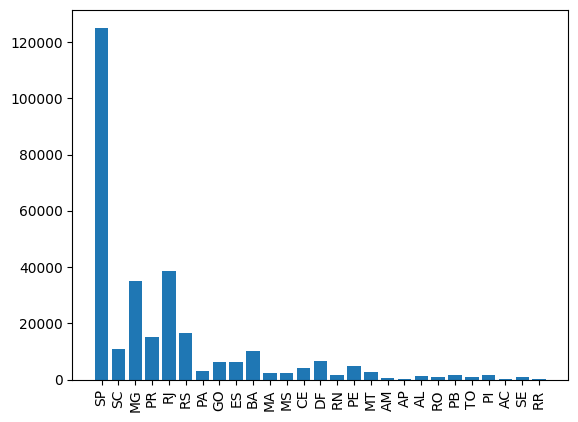

In [7]:
plt.bar(df['State'],df['Customer_count'])
plt.xticks(rotation = 90)



### 6. Calculate the number of orders per month in 2018.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'February'),
  Text(3, 0, 'June'),
  Text(4, 0, 'March'),
  Text(5, 0, 'January'),
  Text(6, 0, 'May'),
  Text(7, 0, 'April'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October')])

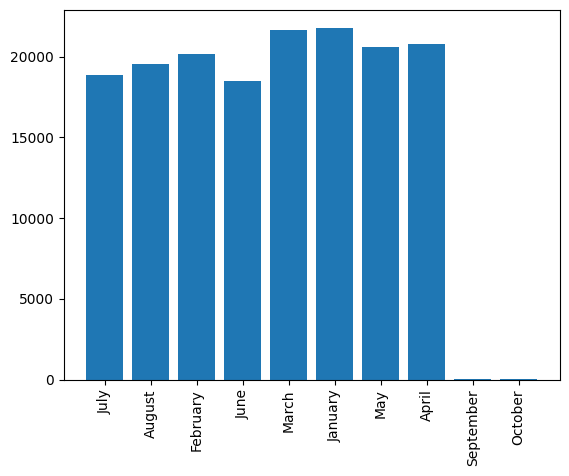

In [8]:
query = """
select monthname(order_purchase_timestamp) months, count(order_id)  order_count
from orders where year(order_purchase_timestamp) = 2018 group by months
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['Months','Order_count'])

plt.bar(df['Months'],df['Order_count'])
plt.xticks(rotation = 90)

### 7. Find the average number of products per order, grouped by customer city.


In [9]:
query = """
with count_per_order as
(select orders.order_id,orders.customer_id,count(order_items.order_id) as Order_Count
from orders join order_items on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id) 

select customers.customer_city, round(avg(count_per_order.Order_Count),2)
average_order from customers join count_per_order
group by customers.customer_city 
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['Customer_city','Avg Products /  Orders'])
df.head()

### 8. Calculate the percentage of total revenue contributed by each product category.


In [13]:
query = """
select products.product_category as category,round(sum(payment.payment_value)/(select sum(payment_value) from payment)*100,2) as sales_percentage
from products join order_items on products.product_id = order_items.product_id
join payment on order_items.order_id = payment.order_id
group by category 
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['category','Sales_percentage'])
df.head()

,category,Sales_percentage
0,perfumery,18.99
1,Furniture Decoration,53.60
2,telephony,18.25
3,bed table bath,64.19
4,automotive,31.94
...,...,...
69,cds music dvds,0.04
70,La Cuisine,0.11
71,Fashion Children's Clothing,0.03
72,PC Gamer,0.08


### 9. Identify the correlation between product price and the number of times a product has been purchased.


In [6]:
import numpy as np 

query = """
select products.product_category, count(order_items.product_id),round(avg(order_items.price),2) from products join order_items on products.product_id = order_items.product_id
group by products.product_category
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['category','order_count','price'])
arr1 = df['order_count']
arr2 = df['price']

a = np.corrcoef([arr1,arr2])
print("The correlation b/w price and number of items a product has been purchased is: ",a[0][1])

The correlation b/w price and number of items a product has been purchased is:  -0.10631514167157569


### 10. Calculate the total revenue generated by each seller, and rank them by revenue.


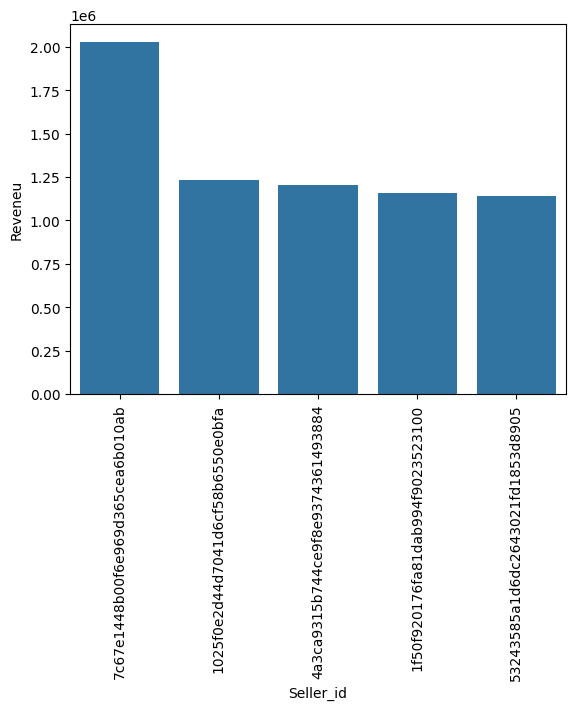

In [13]:
query = """
select *, rank() over(order by reveneu desc) as rn from
(select order_items.seller_id, sum(payment.payment_value) reveneu from order_items 
join payment
on order_items.order_id = payment.order_id
group by order_items.seller_id) as a
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['Seller_id','Reveneu','Rank'])
df = df.head()
sns.barplot(x='Seller_id',y='Reveneu',data=df)
plt.xticks(rotation = 90)
plt.show()